## Capstone Project

In [ ]:
import numpy as np
import pandas as pd
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
all_xray_df = pd.read_csv('C:/Users/cyadav4/Documents/UIC/Fall2022/Capstone- IDS560/Assignments/Capstone Project/data/Data_Entry_2017.csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('C:/Users/cyadav4/Documents/UIC/Fall2022/Capstone- IDS560/Assignments/Capstone Project/data', 'images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df['Patient Age'] = all_xray_df['Patient Age'].map(lambda x: int(x[:-1]))
all_xray_df.sample(3)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,path
104223,00027838_004.png,Mass|Pneumothorax,4,27838,48,F,PA,2992,2991,0.143,0.143,C:/Users/cyadav4/Documents/UIC/Fall2022/Capsto...
85656,00021125_000.png,Infiltration,0,21125,41,F,PA,2770,2717,0.143,0.143,C:/Users/cyadav4/Documents/UIC/Fall2022/Capsto...
43864,00011308_001.png,No Finding,1,11308,55,F,PA,2992,2991,0.143,0.143,C:/Users/cyadav4/Documents/UIC/Fall2022/Capsto...


In [ ]:
all_xray_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,path
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,C:/Users/cyadav4/Documents/UIC/Fall2022/Capsto...
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,C:/Users/cyadav4/Documents/UIC/Fall2022/Capsto...
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,C:/Users/cyadav4/Documents/UIC/Fall2022/Capsto...
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,C:/Users/cyadav4/Documents/UIC/Fall2022/Capsto...
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,C:/Users/cyadav4/Documents/UIC/Fall2022/Capsto...
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,C:/Users/cyadav4/Documents/UIC/Fall2022/Capsto...
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,C:/Users/cyadav4/Documents/UIC/Fall2022/Capsto...
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,C:/Users/cyadav4/Documents/UIC/Fall2022/Capsto...
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,C:/Users/cyadav4/Documents/UIC/Fall2022/Capsto...


Data Exploration

In [ ]:
# Checkinng the datatype
all_xray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImageWidth           112120 non-null  int64  
 8   OriginalImageHeight          112120 non-null  int64  
 9   OriginalImagePixelSpacing_x  112120 non-null  float64
 10  OriginalImagePixelSpacing_y  112120 non-null  float64
 11  path                         112120 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 10.3+ MB


In [ ]:
# Statistical part of our dataset

all_xray_df.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800


In [ ]:
# Checking duplicate values if any

all_xray_df.duplicated().any()   # Don't need to drop any columns or rows

False

In [ ]:
all_xray_df.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImageWidth',
       'OriginalImageHeight', 'OriginalImagePixelSpacing_x',
       'OriginalImagePixelSpacing_y', 'path'],
      dtype='object')

In [ ]:
print(all_xray_df['Patient Gender'].value_counts())
#all_xray_df_count = all_xray_df.groupby('Finding Labels').get_group('Patient Gender')
all_xray_df.isna().sum()
print(all_xray_df['Finding Labels'].value_counts())


M    63340
F    48780
Name: Patient Gender, dtype: int64
No Finding                                                        60412
Infiltration                                                       9551
Atelectasis                                                        4212
Effusion                                                           3959
Nodule                                                             2706
                                                                  ...  
Edema|Infiltration|Mass|Nodule|Pneumonia                              1
Consolidation|Emphysema|Mass|Pneumothorax                             1
Atelectasis|Effusion|Fibrosis|Pneumothorax                            1
Atelectasis|Fibrosis|Infiltration|Nodule|Pneumothorax                 1
Atelectasis|Consolidation|Mass|Pleural_Thickening|Pneumothorax        1
Name: Finding Labels, Length: 790, dtype: int64


#### 1. Generate data from Data_Linear_Classifier.ipynb 

In [ ]:
all_xray_df['Patient Age']= pd.to_numeric(all_xray_df['Patient Age']).astype(float).astype('Int64')
type(all_xray_df['Patient Age'])
all_xray_df['Patient Age'].sample(5)

99437    78
72536    13
28950    60
73701    73
36927    14
Name: Patient Age, dtype: Int64

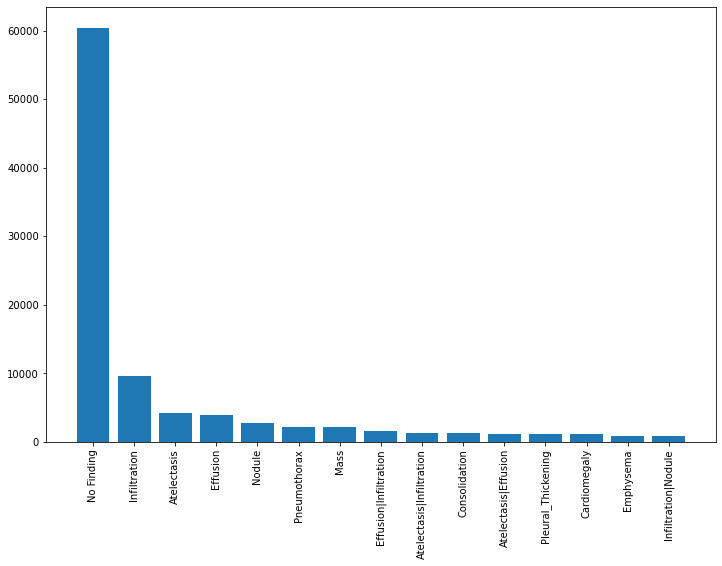

In [ ]:
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [ ]:
from itertools import chain
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1 if c_label in finding else 0)
all_xray_df.sample(3)


All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
31712,00008295_001.png,No Finding,1,8295,66,M,PA,2021,2021,0.194311,...,0,0,0,0,0,1,0,0,0,0
27726,00007212_012.png,No Finding,12,7212,49,M,AP,2500,2048,0.171000,...,0,0,0,0,0,1,0,0,0,0
92655,00023128_008.png,No Finding,8,23128,27,F,AP,3056,2544,0.139000,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
print('All Labels ({}): {}'.format(len(all_labels), all_labels))

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [ ]:
all_labels = [c_label for c_label in all_labels]
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(all_xray_df[c_label].sum())) for c_label in all_labels])

Clean Labels (15) [('Atelectasis', 11535), ('Cardiomegaly', 2772), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13307), ('Emphysema', 2516), ('Fibrosis', 1686), ('Hernia', 227), ('Infiltration', 19870), ('Mass', 5746), ('No Finding', 60412), ('Nodule', 6323), ('Pleural_Thickening', 3385), ('Pneumonia', 1353), ('Pneumothorax', 5298)]


In [ ]:

#all_xray_df[c_label].sample(100)
all_xray_df[(all_xray_df['Patient ID'] == 11460)]


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
44526,00011460_000.png,No Finding,0,11460,16,M,PA,2500,2048,0.168,...,0,0,0,0,0,1,0,0,0,0
44527,00011460_001.png,Pneumothorax,1,11460,16,M,PA,2238,2991,0.143,...,0,0,0,0,0,0,0,0,0,1
44528,00011460_002.png,Pneumothorax,2,11460,16,M,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,1
44529,00011460_003.png,Pneumothorax,3,11460,16,M,PA,2738,2991,0.143,...,0,0,0,0,0,0,0,0,0,1
44530,00011460_004.png,Pneumothorax,4,11460,16,M,PA,2992,2991,0.143,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44598,00011460_072.png,Pleural_Thickening,72,11460,17,M,PA,2048,2500,0.168,...,0,0,0,0,0,0,0,1,0,0
44599,00011460_073.png,No Finding,73,11460,16,M,PA,2506,2991,0.143,...,0,0,0,0,0,1,0,0,0,0
44600,00011460_074.png,Fibrosis,74,11460,16,M,PA,2434,2619,0.143,...,0,1,0,0,0,0,0,0,0,0
44601,00011460_075.png,No Finding,75,11460,16,M,PA,2992,2991,0.143,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# keep at least 1000 cases
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if all_xray_df[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(all_xray_df[c_label].sum())) for c_label in all_labels])

Clean Labels (14) [('Atelectasis', 11535), ('Cardiomegaly', 2772), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13307), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19870), ('Mass', 5746), ('No Finding', 60412), ('Nodule', 6323), ('Pleural_Thickening', 3385), ('Pneumonia', 1353), ('Pneumothorax', 5298)]


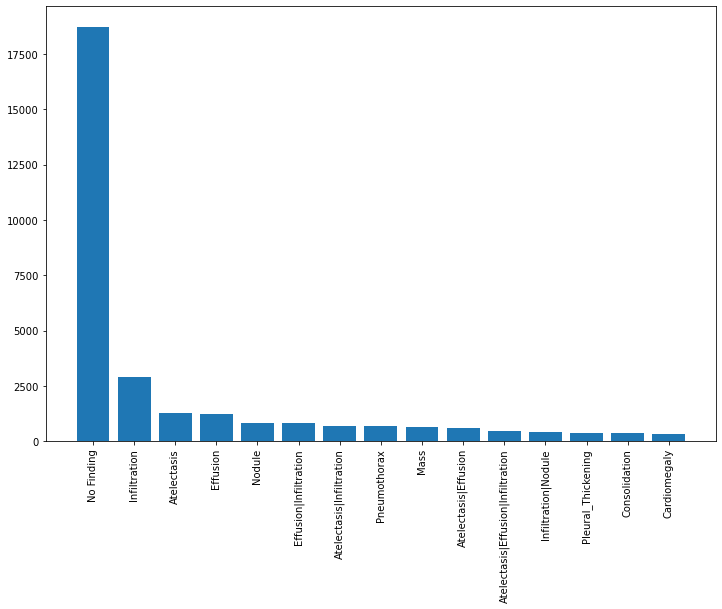

In [ ]:
# since the dataset is very unbiased, we can resample it to be a more reasonable collection
# weight is 0.1 + number of findings
sample_weights = all_xray_df['Finding Labels'].map(lambda x: len(x.split('|')) if len(x)>0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
all_xray_df = all_xray_df.sample(40000, weights=sample_weights)

label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

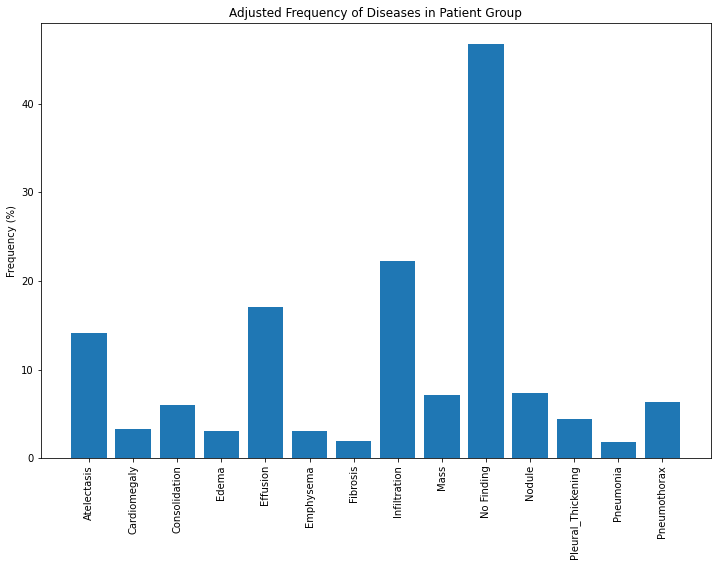

In [ ]:
label_counts = 100*np.mean(all_xray_df[all_labels].values,0)
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_xticklabels(all_labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')

In [ ]:
# Merging 2 columns (Patient ID + Follow-up)

all_xray_df['Pateint_Followups'] = all_xray_df['Patient ID'].astype(str) + '-' + all_xray_df['Follow-up #'].astype(str)
print(all_xray_df.sample(5))

            Image Index        Finding Labels  Follow-up #  Patient ID  \
36067  00009519_000.png            No Finding            0        9519   
6653   00001788_008.png          Infiltration            8        1788   
30678  00008008_057.png            No Finding           57        8008   
53662  00013556_000.png            No Finding            0       13556   
73740  00018126_030.png  Consolidation|Nodule           30       18126   

       Patient Age Patient Gender View Position  OriginalImageWidth  \
36067           44              F            PA                2048   
6653            46              M            PA                2992   
30678           23              F            PA                2782   
53662           62              M            PA                2992   
73740           31              M            AP                2500   

       OriginalImageHeight  OriginalImagePixelSpacing_x  ...  Fibrosis Hernia  \
36067                 2500                     

In [ ]:
for name, group in all_xray_df.groupby('Patient Gender'):
    print(name)
    print(group)


F
             Image Index                                     Finding Labels  \
104651  00028020_001.png                                         No Finding   
43620   00011237_084.png                                         No Finding   
59126   00014626_022.png    Atelectasis|Consolidation|Effusion|Infiltration   
43578   00011237_042.png                                       Infiltration   
105729  00028454_011.png                   Consolidation|Edema|Infiltration   
...                  ...                                                ...   
49198   00012480_003.png                                         No Finding   
547     00000132_000.png                                         No Finding   
88077   00021785_000.png                                         No Finding   
14039   00003635_005.png                                         No Finding   
92950   00023196_003.png  Atelectasis|Cardiomegaly|Effusion|Nodule|Pleur...   

        Follow-up #  Patient ID  Patient Age Pati

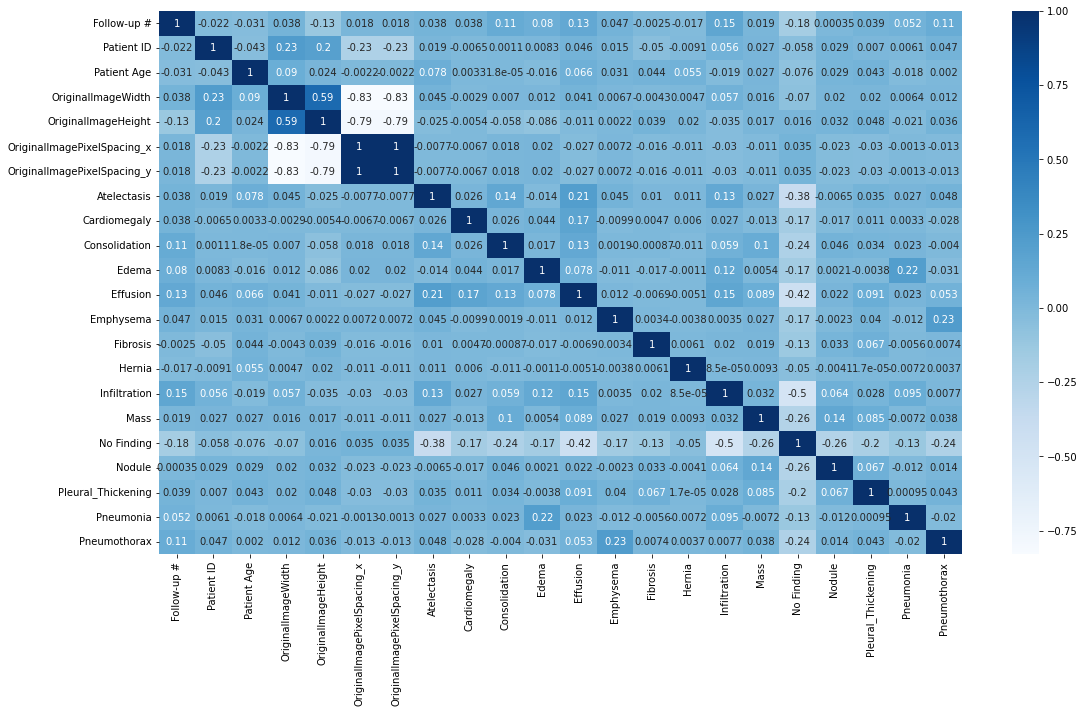

In [ ]:
# Correlation Matrix using seaborn heatmap to better understand the realtionship between our attributes

plt.figure(figsize = (18,10))
sns.heatmap(all_xray_df.corr(),annot = True,cmap = "Blues")
# Show Plot
plt.show()


In [ ]:
# The number of people for each diseases and the most common disease in ascending order

all_xray_df[all_labels].sum().sort_values( ascending = False)


No Finding            18713
Infiltration           8902
Effusion               6810
Atelectasis            5636
Nodule                 2958
Mass                   2837
Pneumothorax           2533
Consolidation          2387
Pleural_Thickening     1783
Cardiomegaly           1331
Edema                  1219
Emphysema              1205
Fibrosis                790
Pneumonia               717
dtype: int64

C:\Users\cyadav4\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


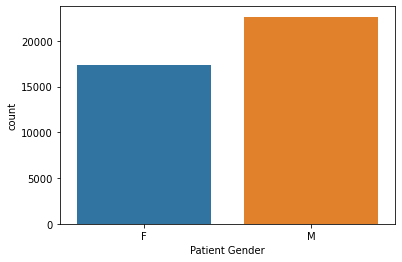

In [ ]:
# Distribution between genders

gender_count = sns.countplot(all_xray_df['Patient Gender'])
plt.show()

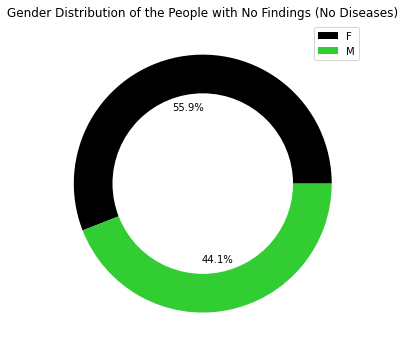

In [ ]:
# Donut Chart visualizing Patients having No Diseases

colors = ( "black","Limegreen")
plt.figure(figsize = (10,5))
plt.pie(all_xray_df[all_xray_df['No Finding'] == 1]['Patient Gender'].value_counts(), autopct='%1.1f%%',colors = colors)
plt.legend(all_xray_df['Patient Gender'].unique())
plt.title('Gender Distribution of the People with No Findings (No Diseases)')

# Draw Circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()



In [ ]:
#The patient demographic Analysis
# The Gender Distribution over the People having Diseases

all_xray_df[all_xray_df['No Finding'] == 0]['Patient Gender'].value_counts()


M    12182
F     9105
Name: Patient Gender, dtype: int64

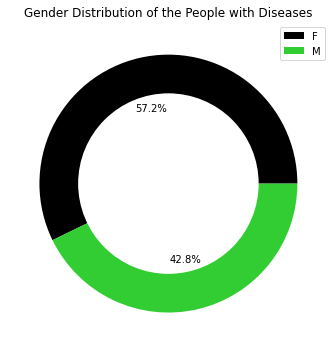

In [ ]:
# Donut Chart showing patients with Diseases

colors = ( "black","Limegreen")
plt.figure(figsize = (10,5))
plt.pie(all_xray_df[all_xray_df['No Finding'] == 0]['Patient Gender'].value_counts(), autopct='%1.1f%%',colors = colors)
plt.legend(all_xray_df['Patient Gender'].unique())
plt.title('Gender Distribution of the People with Diseases')

# Draw Circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()


In [ ]:
# Patients Age 

all_xray_df['Patient Age'] = all_xray_df['Patient Age'].apply(pd.to_numeric)

Patient_Age_unique = all_xray_df['Patient Age'].unique()
print(Patient_Age_unique)                             

 # You can see the outliers 


[ 60  20  45  17  73  77  56  53  26  50  44  58  57  29  47  30  76  72
  49  52  71  54  34  69  55  13  36  35  16  46  43  25  31  66  67  38
  24  74  51  61  63  11  32  21  22  27  88  28  70  33  62  42  40  59
  78  19  10  12  64   7  65  48  14  41  79  39  18  75  37  68  80   9
  82  87   5   6  15  23   3   2  81   4   8  83  86  90  84  89  91  85
  94   1  93 412 155 414  92 150 152 149]


In [ ]:
#Dealing with outliers (Ages over 100)

over = all_xray_df[all_xray_df['Patient Age']>100]
print(len(over))


6


In [ ]:
# Assigning value as 101 if their Age is over 100 

all_xray_df['Patient Age'] = all_xray_df.apply(lambda x: 101 if x['Patient Age'] > 100 else x['Patient Age'], axis=1)


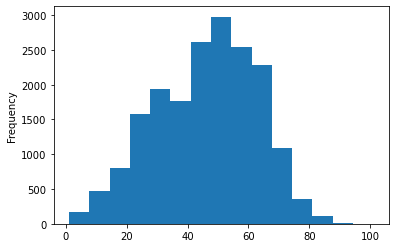

In [ ]:
# Patients vs Age with No Diseases

all_xray_df[all_xray_df['No Finding'] == 1]['Patient Age'].plot(kind = 'hist', bins = 15)
plt.show()


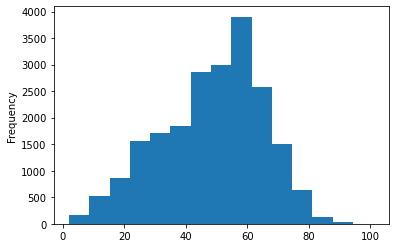

In [ ]:
# Patients vs Age with Diseases

all_xray_df[all_xray_df['No Finding'] == 0]['Patient Age'].plot(kind = 'hist',bins = 15)
plt.show()


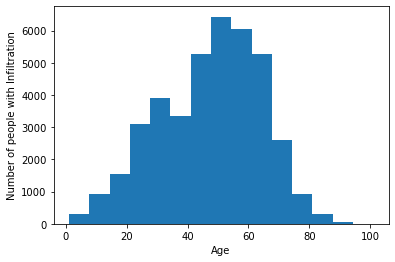

In [ ]:
# Age vs Patients having Infiltration Disease 

all_xray_df['Patient Age'].plot(kind='hist', bins=15)
plt.xlabel("Age")
plt.ylabel("Number of people with Infiltration")
plt.show()


# Training Data 

In [ ]:
all_xray_df['disease_vec'] = all_xray_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

In [ ]:
all_xray_df.shape[0]

40000

In [ ]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_xray_df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = all_xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 30000 validation 10000


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
core_idg = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

In [ ]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [ ]:
train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'path',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)

valid_gen = flow_from_dataframe(core_idg, valid_df, 
                             path_col = 'path',
                            y_col = 'disease_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 256) # we can use much larger batches for evaluation
# used a fixed dataset for evaluating the algorithm


## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 30000 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 10000 images
